In [1]:
import struct as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
def transform_image_bytes_to_np_array(Img_filename, Lbl_filename):
    # Read image file.
    Imgfile = open(Img_filename,'rb')
    Imgfile.seek(0)
    magic = st.unpack('>4B',Imgfile.read(4))    # Ignore this magic number.
    nImg = st.unpack('>I',Imgfile.read(4))[0]   # num of images
    nR = st.unpack('>I',Imgfile.read(4))[0]     # num of rows
    nC = st.unpack('>I',Imgfile.read(4))[0]     # num of column
    
    # Convert the image to np array.
    images_array = np.zeros((nImg,nR,nC))
    nBytesTotal = nImg*nR*nC*1
    images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,Imgfile.read(nBytesTotal))).reshape((nImg,nR,nC))


    # Read label file.
    Lblfile = open(Lbl_filename,'rb')
    Lblfile.seek(0)
    Lblfile.read(4)                          # Ignore first 4 bytes
    N = st.unpack('>I', Lblfile.read(4))[0]  # number of labels

    # Convert the labels to np array.
    labels_array = np.zeros((N))
    labels_array = np.asarray(st.unpack('>'+'B'*N, Lblfile.read(N)))
    
    Imgfile.close()
    Lblfile.close()
    return (images_array, labels_array, nImg, nR, nC)
    

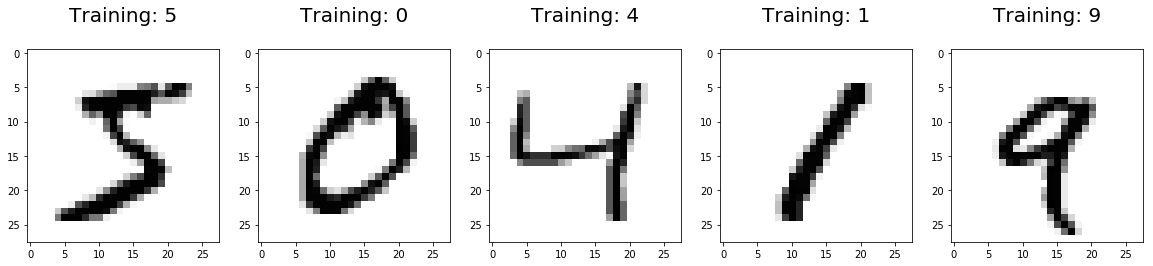

In [3]:
train_images, train_labels, nImgTrain, nRTrain, nCTrain = transform_image_bytes_to_np_array('data/train-images-idx3-ubyte', 'data/train-labels-idx1-ubyte')
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_images.reshape(nImgTrain, -1), train_labels)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 20)

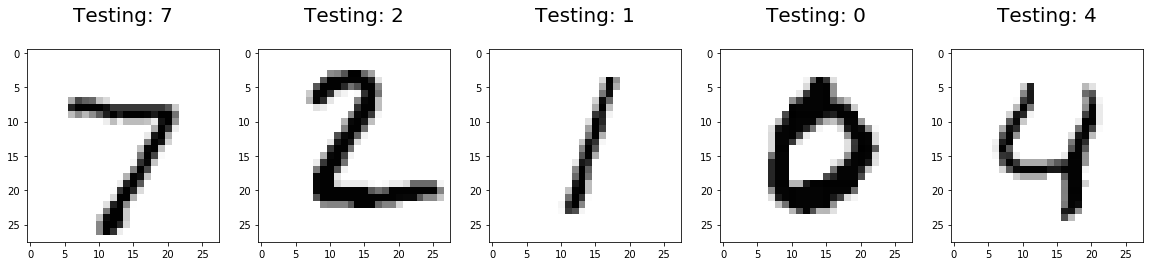

In [4]:
test_images, test_labels, nImgTest, nRTest, nCTest = transform_image_bytes_to_np_array('data/t10k-images-idx3-ubyte', 'data/t10k-labels-idx1-ubyte')

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(test_images[0:5], test_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: {}\n'.format(label), fontsize = 20)

Text(0.5,1,'Prediction: 6\nActual: 6')

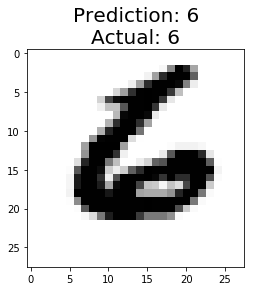

In [5]:
# Predict for an image.
img_index = 9999
predicted_val = logisticRegr.predict(test_images[img_index].reshape(1,-1))[0]
plt.imshow(test_images[img_index], cmap=plt.cm.gray)
plt.title('Prediction: {}\nActual: {}'.format(predicted_val, test_labels[img_index]), fontsize = 20)

In [6]:
score = logisticRegr.score(test_images.reshape(nImgTest, -1), test_labels)
print(score)

0.9195


In [7]:
label_dict = {
    0: [1,0,0,0,0,0,0,0,0,0],
    1: [0,1,0,0,0,0,0,0,0,0],
    2: [0,0,1,0,0,0,0,0,0,0],
    3: [0,0,0,1,0,0,0,0,0,0],
    4: [0,0,0,0,1,0,0,0,0,0],
    5: [0,0,0,0,0,1,0,0,0,0],
    6: [0,0,0,0,0,0,1,0,0,0],
    7: [0,0,0,0,0,0,0,1,0,0],
    8: [0,0,0,0,0,0,0,0,1,0],
    9: [0,0,0,0,0,0,0,0,0,1]
}
predicted_lr = np.array(logisticRegr.predict(test_images.reshape(nImgTest,-1)))
pred_df = pd.DataFrame(predicted_lr)
pred_df = pred_df[0].map(label_dict)
pred_df = pd.DataFrame(pred_df.values.tolist(), columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

pred_df.to_csv('lr.csv', sep=',', index=False, header=False)

In [8]:
randomforest_clf = RandomForestClassifier()
randomforest_clf.fit(train_images.reshape(nImgTrain, -1), train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5,1,'Prediction: 3\nActual: 3')

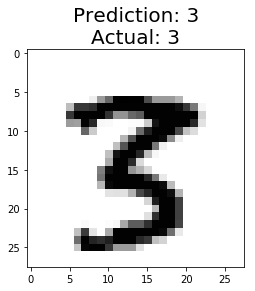

In [9]:
# Predict for an image.
img_index = 991
predicted_rf = randomforest_clf.predict(test_images[img_index].reshape(1,-1))[0]
plt.imshow(test_images[img_index], cmap=plt.cm.gray)
plt.title('Prediction: {}\nActual: {}'.format(predicted_rf, test_labels[img_index]), fontsize = 20)

In [10]:
predicted_rf = randomforest_clf.predict(test_images.reshape(nImgTest,-1))
print(predicted_rf)
score = accuracy_score(test_labels, predicted_rf)
print(score)

[7 2 1 ... 4 5 6]
0.9487


In [11]:
predicted_rf = np.array(randomforest_clf.predict(test_images.reshape(nImgTest,-1)))
pred_rf_df = pd.DataFrame(predicted_rf)
pred_rf_df = pred_rf_df[0].map(label_dict)
pred_rf_df = pd.DataFrame(pred_rf_df.values.tolist(), columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

pred_df.to_csv('rf.csv', sep=',', index=False, header=False)